In [1]:
from glob import glob
import random
import ast

import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ok_img_list = glob('data/ok_img/*')
len(ok_img_list)

100

In [3]:
ng_img_list = glob('data/ng_img/*')
len(ng_img_list)

101

In [4]:
df = pd.read_csv('data/label.csv')
df.region_shape_attributes = df.region_shape_attributes.apply(ast.literal_eval)
df.region_attributes = df.region_attributes.apply(ast.literal_eval)
df

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,GCF3147A6B11CXC48_HistEq_R.jpg,1673732,{},1,0,"{'name': 'rect', 'x': 1943, 'y': 1264, 'width'...",{'Type': 'dust'}
1,GCF3147AX2A1CXC41_HistEq_R.jpg,1671419,{},1,0,"{'name': 'rect', 'x': 7, 'y': 1303, 'width': 1...",{'Type': 'dust'}
2,GCF3147B8JV1CXC4N_HistEq_R.jpg,1670026,{},2,0,"{'name': 'rect', 'x': 5, 'y': 7, 'width': 109,...",{'Type': 'len'}
3,GCF3147B8JV1CXC4N_HistEq_R.jpg,1670026,{},2,1,"{'name': 'rect', 'x': 7, 'y': 1377, 'width': 1...",{'Type': 'len'}
4,GCF3147B8MM1CXC4M_HistEq_R.jpg,1670484,{},1,0,"{'name': 'rect', 'x': 86, 'y': 10, 'width': 10...",{'Type': 'dust'}
...,...,...,...,...,...,...,...
163,GCFGTC00070000007G+3089+Q_HistEq_R.jpg,1663547,{},2,1,"{'name': 'rect', 'x': 1698, 'y': 1437, 'width'...",{'Type': 'shift'}
164,GCFGTD003DB000007G+3089+P_HistEq_R.jpg,1663643,{},2,0,"{'name': 'rect', 'x': 5, 'y': 1437, 'width': 6...",{'Type': 'shift'}
165,GCFGTD003DB000007G+3089+P_HistEq_R.jpg,1663643,{},2,1,"{'name': 'rect', 'x': 1730, 'y': 1439, 'width'...",{'Type': 'shift'}
166,GCFGTD003W2000007G+3089+F_HistEq_R.jpg,1663160,{},2,0,"{'name': 'rect', 'x': 2, 'y': 1441, 'width': 4...",{'Type': 'shift'}


In [5]:
def draw_bbox_on_img(ng_img_list, df):
    ng_img_path = random.choice(ng_img_list)
    ng_img_name = ng_img_path.split('/')[-1]

    img = cv2.imread(ng_img_path, cv2.IMREAD_GRAYSCALE)

    item_df = df[df.filename == ng_img_name]
    item_bbox_list = item_df.region_shape_attributes.to_list()
    item_label_list = item_df.region_attributes.to_list()
    for bbox, label in zip(item_bbox_list, item_label_list):
        img = cv2.rectangle(
            img,
            (bbox['x'], bbox['y']),
            (bbox['x'] + bbox['width'], bbox['y'] + bbox['height']),
            color=(0, 0, 0),
            thickness=3
        )
        img = cv2.putText(
            img,
            label['Type'],
            (int(bbox['x'] + bbox['width'] / 3), bbox['y'] + bbox['height']),
            cv2.FONT_HERSHEY_SIMPLEX,
            1.2, (0, 0, 0), 3
        )
    return img

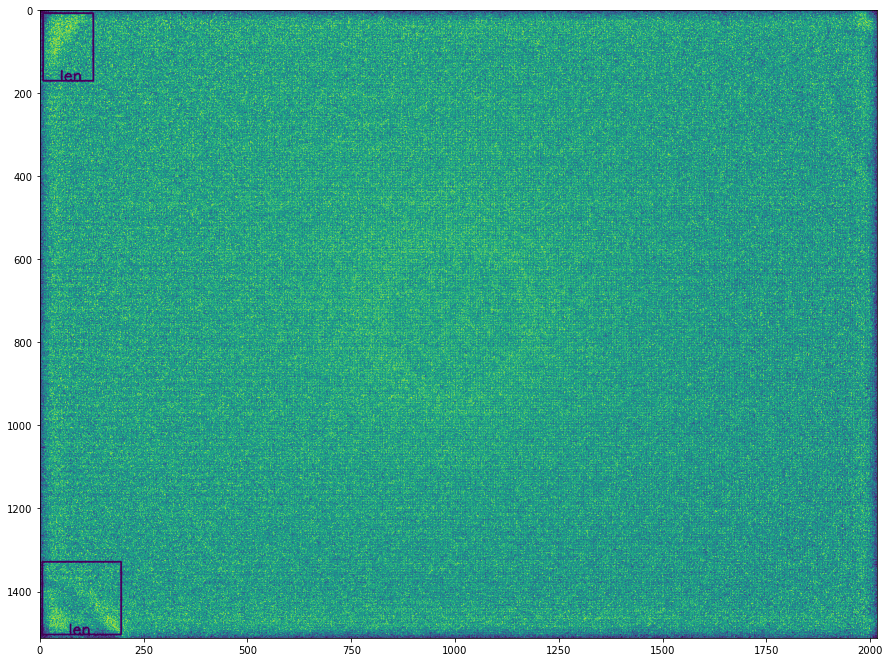

In [12]:
plt.figure(figsize=(15, 15))
plt.imshow(draw_bbox_on_img(ng_img_list, df))
plt.show()